In [61]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
#from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Trainability

## 1D, Gaussian Function

In [62]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.2, 0.01) - gaussian(x, 0.5, 0.01) + gaussian(x, 0.8, 0.01)

x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

(100, 1)


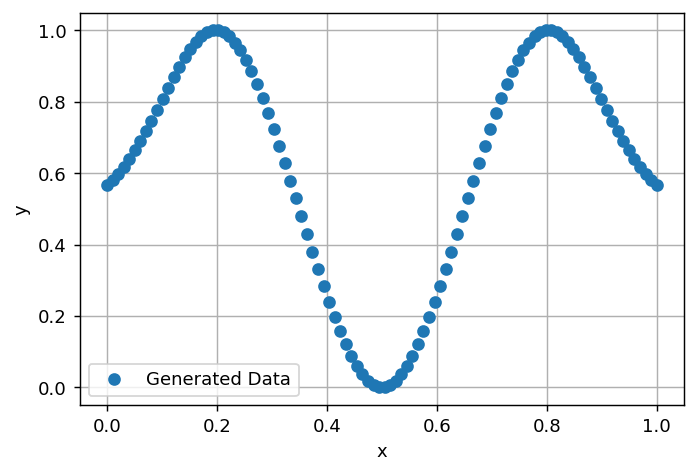

In [63]:
fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Generated Data"])

plt.grid()
plt.show()


fig.savefig(image_path("1D_gaussian_data.pdf"), bbox_inches='tight')

In [70]:
qnn_list1 = loader(data_path("trainability_qcn_1D_reps_1"))
qnn_list2 = loader(data_path("trainability_qcn_1D_reps_2"))
dnn_list1 = loader(data_path("trainability_dnn_1D_epochs_100"))
dnn_list2 = loader(data_path("trainability_dnn_1D_epochs_10000"))

In [71]:
loss1 = np.array([qnn.loss for qnn in qnn_list1])
std1 = np.std(loss1, axis=0)/2
avg1 = np.mean(loss1, axis=0)

loss2 = np.array([qnn.loss for qnn in qnn_list2])
std2 = np.std(loss2, axis=0)/2
avg2 = np.mean(loss2, axis=0)

loss3 = np.array([dnn.loss for dnn in dnn_list1])
std3 = np.std(loss3, axis=0)/2
avg3 = np.mean(loss3, axis=0)

loss4 = np.array([dnn.loss for dnn in dnn_list2])
std4 = np.std(loss4, axis=0)/2
avg4 = np.mean(loss4, axis=0)

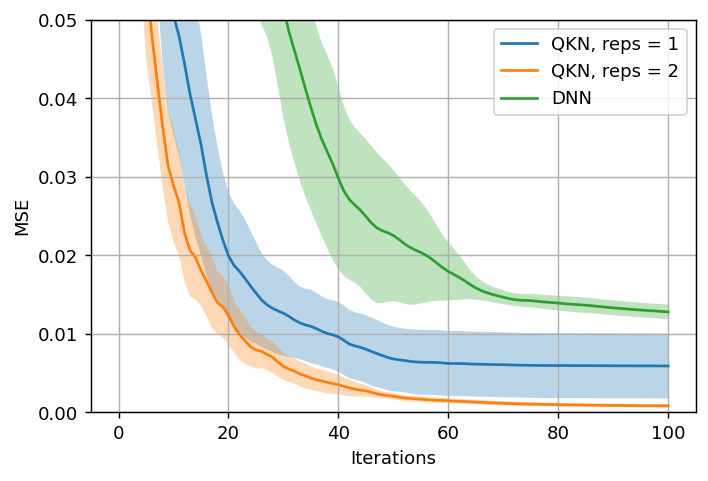

In [72]:
alpha = 0.3
epochs = list(range(101))

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')

plt.fill_between(epochs, avg1 - std1, avg1 + std1, alpha=alpha)
plt.fill_between(epochs, avg2 - std2, avg2 + std2, alpha=alpha)
plt.fill_between(epochs, avg3 - std3, avg3 + std3, alpha=alpha)
plt.plot(epochs, avg1)
plt.plot(epochs, avg2)
plt.plot(epochs, avg3[:101])

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend(["QKN, reps = 1", "QKN, reps = 2", "DNN"])
plt.grid()
plt.ylim([0, 0.05])
plt.show()

fig.savefig(image_path("1D_gaussian_data_fit.pdf"), bbox_inches='tight')

In [58]:
print(avg1[-1], avg2[-1], avg3[-1], avg4[-1])

0.005881037377476609 0.0007992937291191819 0.012761801860462893 0.00039880464681009913


## 2D

In [76]:
np.random.seed(42)

n = 12
x = np.linspace(0, 1, n)
x = generate_meshgrid([x,x])

mean1 = np.array([[0.2, 0.8]])
var1 = np.array([[0.01, 0], [0, 0.01]])

mean2 = np.array([[0.5, 0.8]])
var2 = np.array([[0.01, 0], [0, 0.01]])

mean3 = np.array([[0.8, 0.8]])
var3 = np.array([[0.01, 0], [0, 0.01]])

mean4 = np.array([[0.2, 0.5]])
var4 = np.array([[0.01, 0], [0, 0.01]])

mean5 = np.array([[0.5, 0.5]])
var5 = np.array([[0.01, 0], [0, 0.01]])

mean6 = np.array([[0.8, 0.5]])
var6 = np.array([[0.01, 0], [0, 0.01]])

mean7 = np.array([[0.2, 0.2]])
var7 = np.array([[0.01, 0], [0, 0.01]])

mean8 = np.array([[0.5, 0.2]])
var8 = np.array([[0.01, 0], [0, 0.01]])

mean9 = np.array([[0.8, 0.2]])
var9 = np.array([[0.01, 0], [0, 0.01]])


y = gaussian(x, mean1, var1) - gaussian(x, mean2, var2) + gaussian(x, mean3, var3) - gaussian(x, mean4, var4) +\
gaussian(x, mean5, var5) - gaussian(x, mean6, var6) + gaussian(x, mean7, var7) - gaussian(x, mean8, var8) +\
gaussian(x, mean9, var9)


x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)

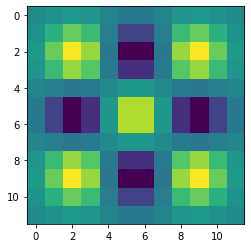

In [77]:
plt.imshow(y.reshape(n,n))
plt.show()

In [84]:
qnn_list1 = loader(data_path("trainability_qcn_2D_reps_1"))
qnn_list2 = loader(data_path("trainability_qcn_2D_reps_2"))
dnn_list1 = loader(data_path("trainability_dnn_2D_epochs_100"))
dnn_list2 = loader(data_path("trainability_dnn_2D_epochs_10000"))

In [85]:
loss1 = np.array([qnn.loss for qnn in qnn_list1])
std1 = np.std(loss1, axis=0)
avg1 = np.mean(loss1, axis=0)

loss2 = np.array([qnn.loss for qnn in qnn_list2])
std2 = np.std(loss2, axis=0)
avg2 = np.mean(loss2, axis=0)

loss3 = np.array([dnn.loss for dnn in dnn_list1])
std3 = np.std(loss3, axis=0)
avg3 = np.mean(loss3, axis=0)

loss4 = np.array([dnn.loss for dnn in dnn_list2])
std4 = np.std(loss4, axis=0)
avg4 = np.mean(loss4, axis=0)

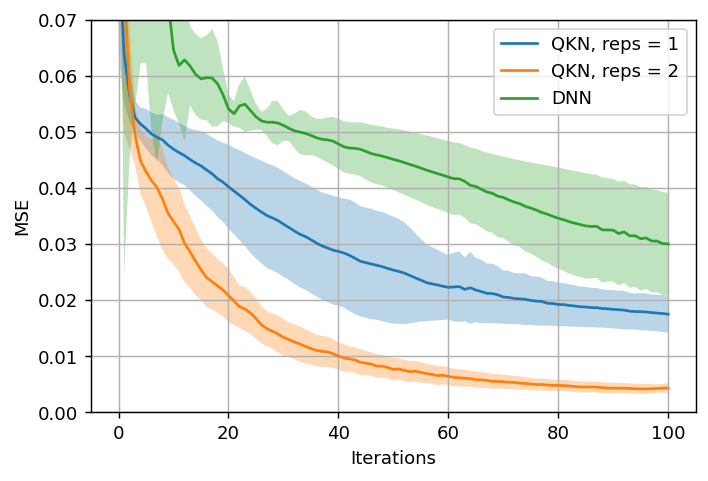

In [86]:
alpha = 0.3
epochs = list(range(101))

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')

plt.fill_between(epochs, avg1 - std1, avg1 + std1, alpha=alpha)
plt.fill_between(epochs, avg2 - std2, avg2 + std2, alpha=alpha)
plt.fill_between(epochs, avg3 - std3, avg3 + std3, alpha=alpha)
plt.plot(epochs, avg1)
plt.plot(epochs, avg2)
plt.plot(epochs, avg3)

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.ylim([0, 0.07])
plt.legend(["QKN, reps = 1", "QKN, reps = 2", "DNN"])
plt.grid()
plt.show()

fig.savefig(image_path("2D_gaussian_data_fit.pdf"), bbox_inches='tight')

In [25]:
print(avg1[-1], avg2[-1], avg3[-1], avg4[-1])

0.027911810512937684 0.014317800825814398 0.044650025352242766 0.026869623537143218


## 3D

In [27]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x_qnn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)

In [28]:
qnn_list1 = loader(data_path("trainability_qcn_3D_reps_1"))
qnn_list2 = loader(data_path("trainability_qnn_3D_reps_2"))
dnn_list1 = loader(data_path("trainability_dnn_3D_epochs_100"))
dnn_list2 = loader(data_path("trainability_dnn_3D_epochs_10000"))

In [29]:
loss1 = np.array([qnn.loss for qnn in qnn_list1])
std1 = np.std(loss1, axis=0)
avg1 = np.mean(loss1, axis=0)

loss2 = np.array([qnn.loss for qnn in qnn_list2])
std2 = np.std(loss2, axis=0)
avg2 = np.mean(loss2, axis=0)

loss3 = np.array([dnn.loss for dnn in dnn_list1])
std3 = np.std(loss3, axis=0)
avg3 = np.mean(loss3, axis=0)

loss4 = np.array([dnn.loss for dnn in dnn_list2])
std4 = np.std(loss4, axis=0)
avg4 = np.mean(loss4, axis=0)

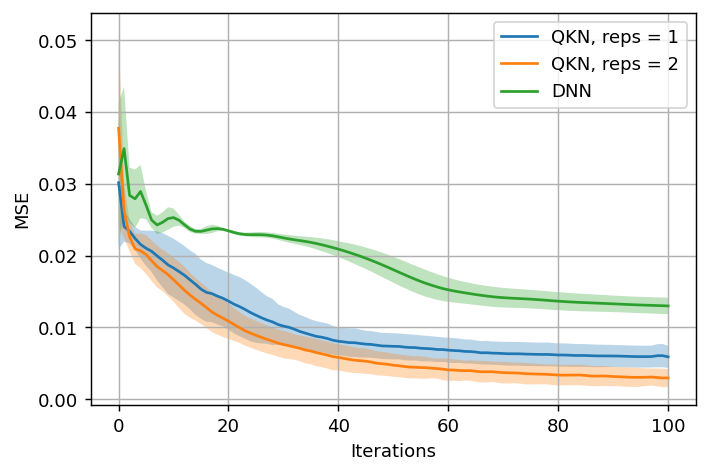

In [30]:
alpha = 0.3
epochs = list(range(101))

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')

plt.fill_between(epochs, avg1 - std1, avg1 + std1, alpha=alpha)
plt.fill_between(epochs, avg2 - std2, avg2 + std2, alpha=alpha)
plt.fill_between(epochs, (avg3 - std3)[:101], (avg3 + std3)[:101], alpha=alpha)
plt.plot(epochs, avg1)
plt.plot(epochs, avg2)
plt.plot(epochs, avg3[:101])

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend(["QKN, reps = 1", "QKN, reps = 2", "DNN"])
plt.grid()
plt.show()

fig.savefig(image_path("3D_gaussian_data_fit.pdf"), bbox_inches='tight')

In [31]:
print(avg1[-1], avg2[-1], avg3[-1], avg4[-1])

0.005897255128035559 0.0029618288160730205 0.012991440759601819 0.0031249025157559576


### Deep Quantum Kernel Network

In [ ]:
qnn = loader(data_path("trainability_qnn_3D_deep"))

y_pred = qnn.predict(x)
print(r2(y_pred, y))

In [ ]:
plt.imshow(y_pred.reshape(n,n,n)[2])
plt.show()